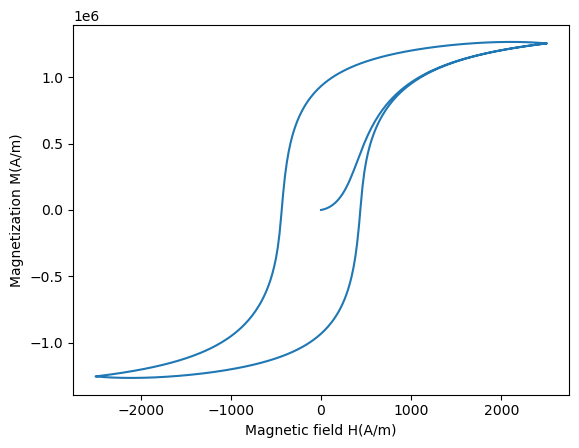

In [3]:
import numpy as np
from matplotlib import pyplot as plt

mu0 = 4 * np.pi * 1e-7  # H/m

a = 470  # A/m
alpha = 9.38e-4
c = 0.0889
k = 483  # A/m
Ms = 1.48e6  # A/m

H = [0]
delta = [0]
Man = [0]
dMirrdH = [0]
Mirr = [0]
M = [0]

DeltaH = 20
Nfirst = 125
Ndown = 250
Nup = 250

for i in range(Nfirst):
    H.append(H[i] + DeltaH)

for i in range(Ndown):
    H.append(H[-1] - DeltaH)

for i in range(Nup):
    H.append(H[-1] + DeltaH)

delta = [0]
for i in range(len(H) - 1):
    if H[i + 1] > H[i]:
        delta.append(1)
    else:
        delta.append(-1)


def L(x):
    return (np.cosh(x) / np.sinh(x)) - (1 / x)


for i in range(Nfirst + Ndown + Nup):
    Man.append(Ms * (1 / np.tanh(
        (H[i + 1] + alpha * M[i]) / a) - a / (H[i + 1] + alpha * M[i])))
    dMirrdH.append(
        (Man[i + 1] - M[i]) / (k * delta[i + 1] - alpha * (Man[i + 1] - M[i])))
    Mirr.append(Mirr[i] + dMirrdH[i + 1] * (H[i + 1] - H[i]))
    M.append(c * Man[i + 1] + (1 - c) * Mirr[i + 1])

plt.plot(H, M)
plt.xlabel("Magnetic field H(A/m)")
plt.ylabel("Magnetization M(A/m)")
plt.show()
